<b>DATA 620 - Final Project</b>

<b>Team Group 1: Gabrielle Bartomeo, Zach Dravis, Peter Lombardo, and Hovig Ohannessian</b>

In [90]:
import twitter
import json
import sys
import time
import re
from collections import Counter
import nltk
import networkx as nx
import matplotlib.pyplot as plt

CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(domain='api.twitter.com', 
                              api_version='1.1',
                              auth=auth
                             )

In [91]:
search_results = twitter_api.search.tweets(q="cloud", count=100)
statuses = search_results['statuses']

for _ in range(5): 
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: 
        break

    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ]) 
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
    
print json.dumps(statuses[0:2], indent=1)

[
 {
  "contributors": null, 
  "truncated": false, 
  "text": "RT @tofublock: cloud or giant shaved ice \ud83e\udd14 https://t.co/voUjFvQ5Vg", 
  "is_quote_status": false, 
  "in_reply_to_status_id": null, 
  "id": 1017597195162288128, 
  "favorite_count": 0, 
  "entities": {
   "symbols": [], 
   "user_mentions": [
    {
     "id": 780148467079450624, 
     "indices": [
      3, 
      13
     ], 
     "id_str": "780148467079450624", 
     "screen_name": "tofublock", 
     "name": "jauni"
    }
   ], 
   "hashtags": [], 
   "urls": [], 
   "media": [
    {
     "source_user_id": 780148467079450624, 
     "source_status_id_str": "1017509104682749952", 
     "expanded_url": "https://twitter.com/tofublock/status/1017509104682749952/photo/1", 
     "display_url": "pic.twitter.com/voUjFvQ5Vg", 
     "url": "https://t.co/voUjFvQ5Vg", 
     "media_url_https": "https://pbs.twimg.com/media/Dh7q3EDX4AIokvI.jpg", 
     "source_user_id_str": "780148467079450624", 
     "source_status_id": 101750

In [92]:
tweets = [status['text'] for status in statuses]
print tweets[0]

RT @tofublock: cloud or giant shaved ice 🤔 https://t.co/voUjFvQ5Vg


In [93]:
words = []
for t in tweets:
    words += [ w for w in t.split() ]

length_total_words = len(words) 
length_unique_words = len(set(words)) 
avg_words_per_tweet = 1.0*sum([ len(t.split()) for t in tweets ])/len(tweets) 

print length_total_words
print length_unique_words
print avg_words_per_tweet

9451
4163
15.7779632721


In [94]:
retweeted_patterns = re.compile(r"(RT|via)((?:\b\W*@\w+)+)", re.IGNORECASE)
our_tweets = ["RT @hovig613 - IBM Cloud", "IBM Watson Cloud (@hovig613)"]
for t in our_tweets:
    print retweeted_patterns.findall(t)

[('RT', ' @hovig613')]
[]


Name: Most Tweeted Cloud Subject
Type: DiGraph
Number of nodes: 506
Number of edges: 324
Average in degree:   0.6403
Average out degree:   0.6403


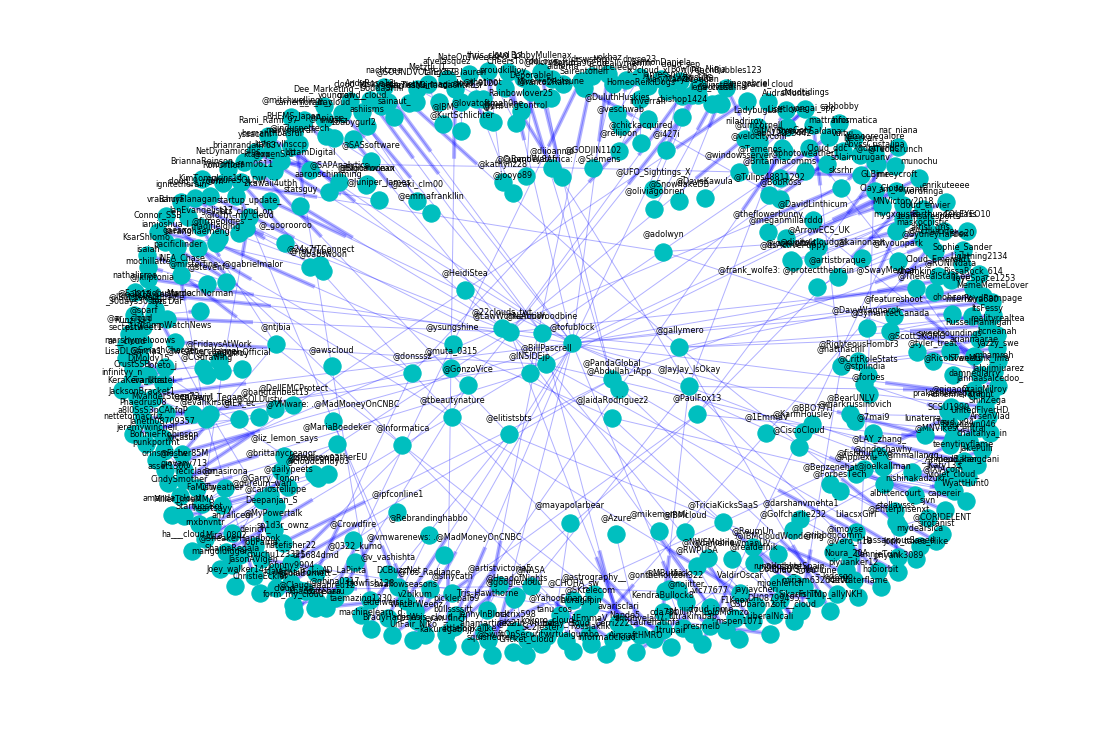

In [97]:
g = nx.DiGraph(name="Most Tweeted Cloud Subject")
pos_labels = {}

def get_retweeted_sources(tweet):
    retweeted_patterns = re.compile(r'(RT|via)((?:\b\W*@\w+)+)', re.IGNORECASE)
    return [ source.strip()
             for tuple in retweeted_patterns.findall(tweet)
                 for source in tuple
                     if source not in ("RT", "via") ]

for status in statuses:
    retweeted_patterns = get_retweeted_sources(status['text'])
    if not retweeted_patterns: continue
    for i in retweeted_patterns:
        g.add_edge(i, status['user']['screen_name'], {'tweet_id' : status['id']})
            
print nx.info(g)

plt.figure(figsize=(19,13));
pos = nx.spring_layout(g,k=.12);
keys = pos.keys()
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y+0.03)
nx.draw_networkx_edges(g,pos, edge_color='b',alpha=.3);
nx.draw_networkx_nodes(g,pos,node_color='c',node_size=300);
nx.draw_networkx_labels(g,pos_labels,font_size=8) 
plt.axis('off')
plt.show()